## Demo for learning single channel PSF from bead data

##### Setup environment

In [11]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_user')
```

In [12]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='voxel',channeltype='1ch',sysfile='LLS_LK')

##### Edit user defined parameters

In [13]:
L.param.datapath = r'E:\EMBL files\data for PSF learning\LLS_Data\20220207_SMAP\full_stacks_no_deskew/'
L.param.keyword = 'LP20' # keyword for your data file
L.param.subfolder = '' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.savename = L.param.datapath + 'psfmodel' + L.param.keyword
L.param.gain = 0.47
L.param.ccd_offset = 100
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.2 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 100 
L.param.roi.bead_radius = 0.0 # unit: micron
L.param.roi.peak_height = 0.2 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.batch_size = 100 # lower this number if out of memory
L.param.option.model.var_photon = True
L.param.loss_weight.Inorm = 1
L.param.rej_threshold.bias_z = 2.1 # threshold for ourlier removal

Optional parameters for zernike PSF learning, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'zernike', 'zernike_vector', 'pupil', 'pupil_vector'` | `'zernike_vector'`


##### Start learning

In [14]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,3): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:\EMBL files\data for PSF learning\LLS_Data\20220207_SMAP\full_stacks_no_deskew\20211117_beads_agarose_LS_30_1000_50ms_LP20_green_filt1.czi
(1, 501, 500, 2048)
rois shape channel : (40, 31, 57, 20)
padded rois shape channel : (40, 31, 57, 20)
deskewed rois shape channel : (40, 31, 19, 19)


3/6: learning: 99/250 [00:06s] 15.49it/s, current loss: 20.27098, total time: 6.39s


deskewed rois shape channel : (40, 31, 19, 19)


3/6: learning: 139/250 [00:08s] 15.45it/s, current loss: 19.20754, total time: 9.00s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.09it/s total time: 9.91s
5/6: localization: 12/12 [00:00s] 15.68it/s total time: 10.67s


outlier id: [ 1  2  3  4  9 10 13 14 16 25 30 33]
rois shape channel : (28, 31, 19, 19)


3/6: learning: 130/250 [00:07s] 16.28it/s, current loss: 12.23010, total time: 18.65s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.10it/s total time: 19.56s
5/6: localization: 12/12 [00:00s] 15.30it/s total time: 20.34s
3/6: learning: 162/250 [00:10s] 16.09it/s, current loss: 13.06171, total time: 10.07s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.11it/s total time: 10.97s
5/6: localization: 12/12 [00:00s] 17.19it/s total time: 11.66s


outlier id: [ 2  6  7  8  9 12 19]
rois shape channel : (21, 31, 19, 19)


3/6: learning: 173/250 [00:10s] 17.00it/s, current loss: 10.57917, total time: 21.83s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.10it/s total time: 22.74s
5/6: localization: 12/12 [00:00s] 18.02it/s total time: 23.41s
3/6: learning: 143/250 [00:08s] 17.14it/s, current loss: 11.34025, total time: 8.34s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.11it/s total time: 9.24s
5/6: localization: 12/12 [00:00s] 18.30it/s total time: 9.90s


outlier id: [ 1  6 14]
rois shape channel : (18, 31, 19, 19)


3/6: learning: 124/250 [00:07s] 17.04it/s, current loss: 11.47244, total time: 17.17s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.11it/s total time: 18.07s
5/6: localization: 12/12 [00:00s] 16.93it/s total time: 18.78s
6/6: saving results: [00:02s] total time: 21.02s


##### Show results

In [86]:
f,p = io.h5.load(resfile) # load result file

In [87]:
print('output parameters')
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

output parameters
f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['I_model', 'I_model_bead', 'I_model_reverse', 'bg', 'cor', 'cor_all', 'drift_rate', 'intensity', 'offset', 'pos']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']


bead0


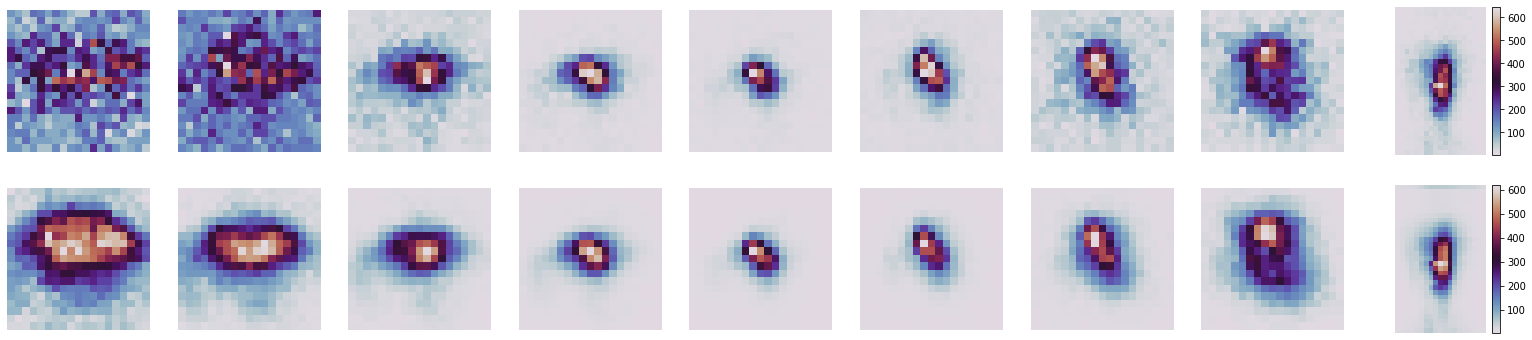

bead1


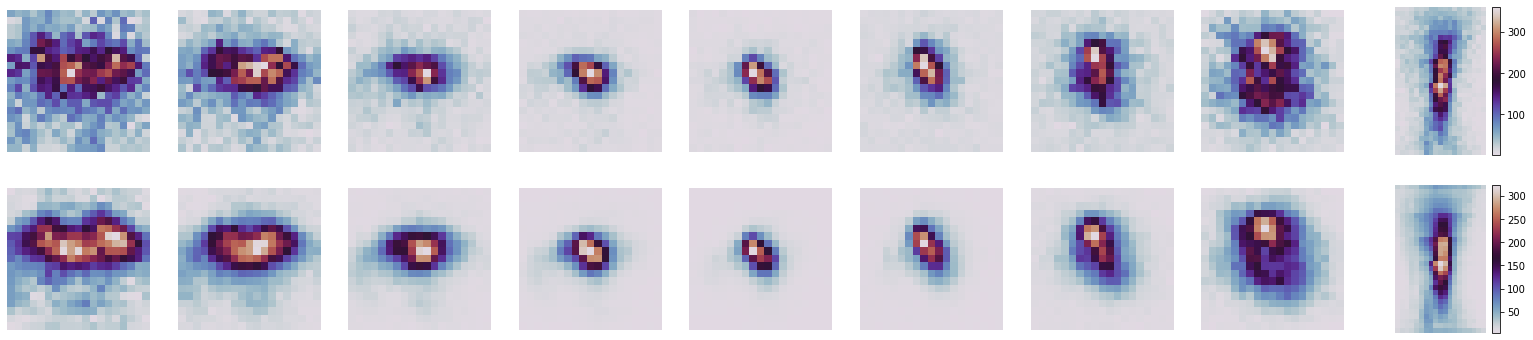

bead2


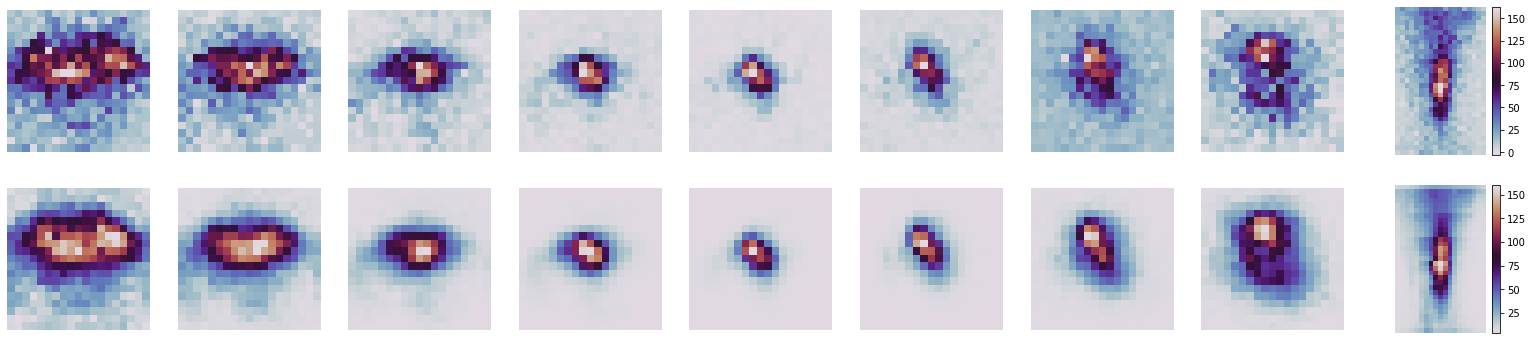

bead3


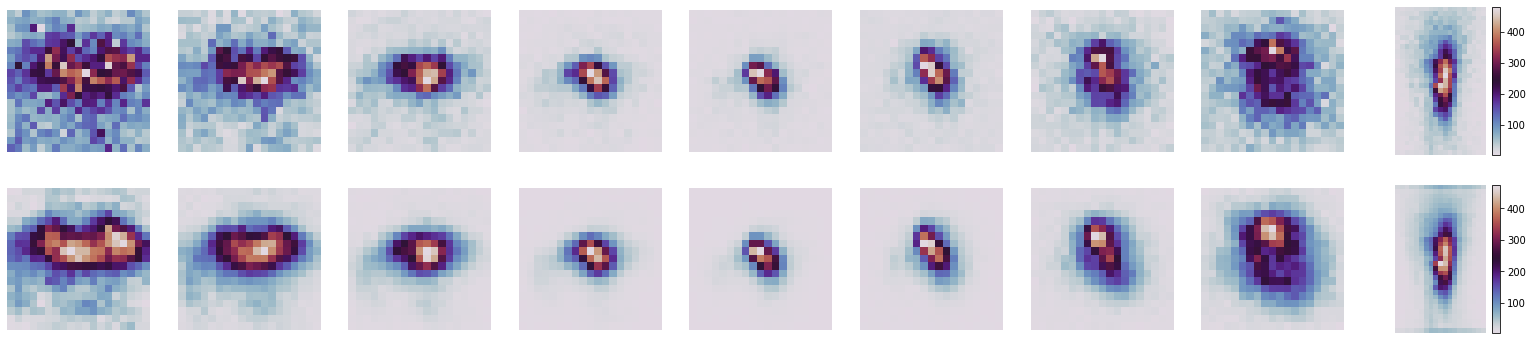

bead4


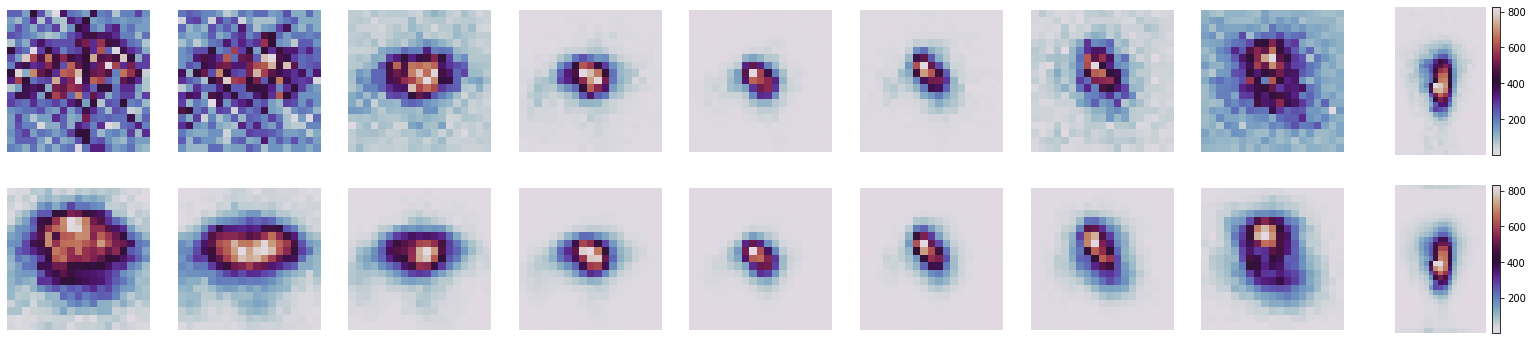

In [15]:
for i in range(0,np.min([5,f.rois.psf_data.shape[0]])):
    print('bead'+str(i))
    showpsfvsdata(f,p,index=i)

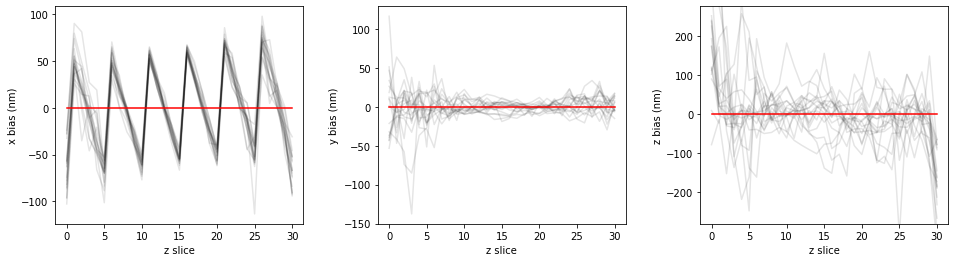

In [16]:
showlocalization(f,p)

##### Optional plots

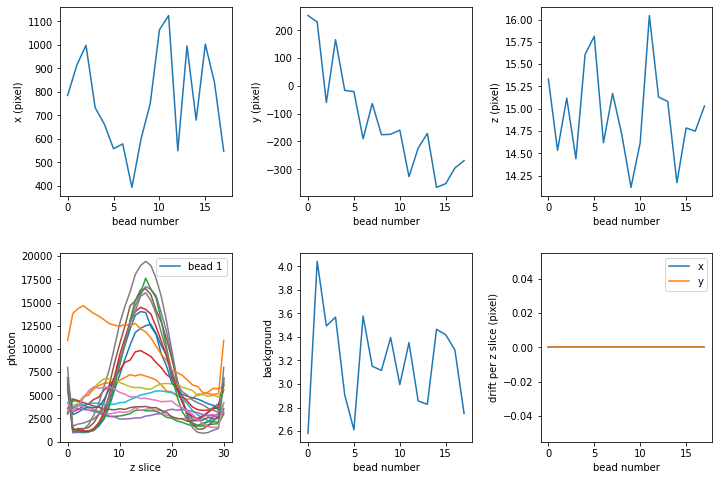

In [17]:
showlearnedparam(f,p)

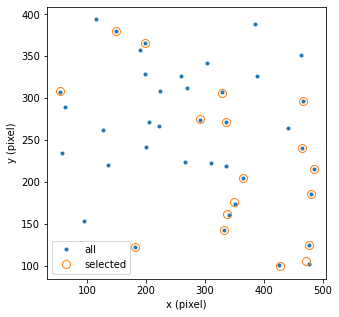

In [18]:
showcoord(f,p)

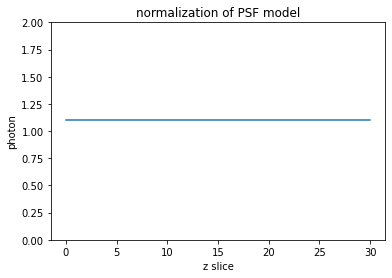

In [92]:
plt.plot(np.sum(f.res.I_model,axis=(-1,-2)))
plt.ylim([0,2])
plt.xlabel("z slice")
plt.ylabel("photon")
plt.title("normalization of PSF model")
plt.show()

In [ ]:
try:
    showpupil(f,p)
except:
    print('no pupil')

In [ ]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')